In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile
from scipy.interpolate import interp1d
import auxiliary_lib as au
import isamcalc_lib as isam
import subprocess
import socplot_lib as socplt
import Fluxtools as flux

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
Fluxtools.py:61: RuntimeWarning: Mean of empty slice
  daily_srs[i] = np.nanmean(srs[i*nstep:(i+1)*nstep])
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


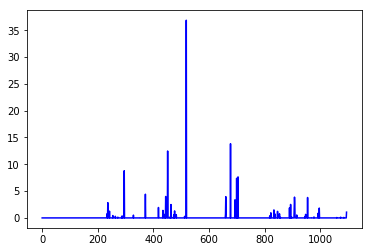

In [2]:
# Back calculation of water table depth
# Site information
# 1. Read in the observed and calculated CH4
site = ["US-Bi1", "US-Bi2", "US-OWC", "US-DPW", "US-Ho1", "US-LA1", "US-LA2", "US-Los", "US-Sne", "US-Snf"]
styear = [2016, 2017, 2015, 2013, 1996, 2011, 2011, 2000, 2016, 2018]
years = [3, 2, 2, 3, 23, 2, 2, 20, 3, 1]

# US-Bi1
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[0]+"/"
fname="AMF_"+site[0]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
ch4_emis = ch4_emis*3600*16/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

#plt.plot(ch4_obs_daily, 'g-')
#plt.plot(ch4_mod_daily, 'b-')
#plt.title(site[0])

# 2. See if calcukated CH4 is higher than observation, if so calculate the percentage
# Decrease the WTD based on 5cm / [10%], it seems like a exponential decrease would be better but right now we just 
# use linear relationship to modify water table depth
lenmod = len(ch4_mod_daily)
diff = np.zeros((lenmod))
diff = (ch4_mod_daily - ch4_obs_daily[0:lenmod])/ch4_obs_daily[0:lenmod];
wtd = 0.001 * np.ones((len(diff)))
for i in np.arange(0,lenmod):
    if(diff[i]>0):
        wtd[i] = wtd[i] + 0.05 * diff[i]/0.1

plt.plot(wtd, 'b-')


In [4]:
# US-Bi2
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[1]+"/"
fname="AMF_"+site[1]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
ch4_emis = ch4_emis*16*3600/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

# plt.plot(ch4_obs_daily[140:len(ch4_obs_daily)], 'g-')
# plt.plot(ch4_mod_daily, 'b-')
# plt.title(site[1])

lenmod = len(ch4_mod_daily)
diff = np.zeros((lenmod))
diff = (ch4_mod_daily - ch4_obs_daily[0:lenmod])/ch4_obs_daily[0:lenmod];
wtd = 0.001 * np.ones((len(diff)))
for i in np.arange(0,lenmod):
    if(diff[i]>0):
        wtd[i] = wtd[i] + 0.05 * diff[i]/0.1
        
plt.plot(wtd, 'b-')

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


ValueError: operands could not be broadcast together with shapes (1095,) (921,) 

In [7]:
np.shape(ch4_obs_daily[0:lenmod])

(921,)

In [9]:
# US-OWC
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[2]+"/"
fname="AMF_"+site[2]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
# It seems like this site has 100nmol CH4 m-2 s-1 as unit...
ch4_emis = ch4_emis*16*3600/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

# plt.plot(ch4_obs_daily_20d, 'g-')
# plt.plot(ch4_mod_daily_20d, 'b-')
# plt.title(site[2])

lenmod = len(ch4_mod_daily)
diff = np.zeros((lenmod))
diff = (ch4_mod_daily - ch4_obs_daily[0:lenmod])/ch4_obs_daily[0:lenmod];
wtd = 0.001 * np.ones((len(diff)))
for i in np.arange(0,lenmod):
    if(diff[i]>0):
        wtd[i] = wtd[i] + 0.05 * diff[i]/0.1
        
plt.plot(wtd, 'b-')

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


ValueError: operands could not be broadcast together with shapes (1095,) (669,) 

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


Text(0.5,1,'US-DPW')

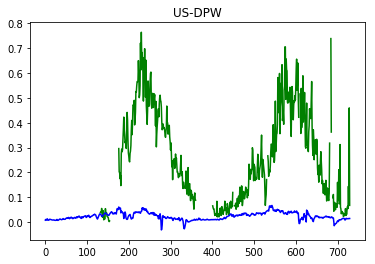

In [26]:
# US-DPW
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[3]+"/"
fname="AMF_"+site[3]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
ch4_emis = ch4_emis*16*3600/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas_ref.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

plt.plot(ch4_obs_daily[0:730], 'g-')
plt.plot(ch4_mod_daily[0:730], 'b-')
plt.title(site[3])

# lenmod = len(ch4_mod_daily)
# diff = np.zeros((lenmod))
# diff = (ch4_mod_daily - ch4_obs_daily[0:lenmod])/ch4_obs_daily[0:lenmod];
# wtd = 0.001 * np.ones((len(diff)))
# for i in np.arange(0,lenmod):
#     if(diff[i]>0):
#         wtd[i] = wtd[i] + 0.05 * diff[i]/0.1

# plt.ylim([0,2])
# plt.plot(wtd, 'b-')

# # Expand the WTD into 48 timesteps for everyday and store the calculated WTD into CSV
# wtd_step = np.zeros((lenmod*48))
# for i in np.arange(0,lenmod):
#     if(wtd[i]>1):
#         wtd_step[i*48:(i+1)*48] = 1.
#     else:
#         wtd_step[i*48:(i+1)*48] = wtd[i]

# nclu=NetCDFFile('/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/pre-processing/US-DPW_WT.nc','r+')
# ncvar_wt = nclu.variables['WT'][:]
# dlen = np.shape(ncvar_wt)
# if(dlen[0] > lenmod*48):
#     wtd_newstep = 0.001*np.ones(dlen)
#     wtd_newstep[0:lenmod*48,0,0] = wtd_step
# else:
#     wtd_newstep = wtd_step
# nclu.variables['WT'][:] = wtd_newstep
# nclu.close()

In [18]:
nclu.close()

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


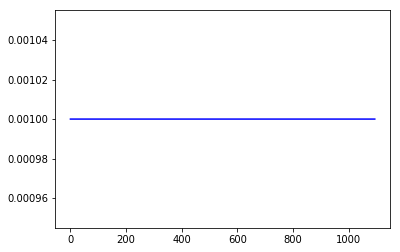

In [22]:
# US-Ho1
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[4]+"/"
fname="AMF_"+site[4]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
ch4_emis = ch4_emis*3600*16/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

# plt.plot(ch4_obs_daily[365*17:365*19], 'g-')
# plt.plot(ch4_mod_daily, 'b-')
# plt.ylim([-0.02, 0.02])
# plt.title(site[4])

lenmod = len(ch4_mod_daily)
diff = np.zeros((lenmod))
diff = (ch4_mod_daily - ch4_obs_daily[0:lenmod])/ch4_obs_daily[0:lenmod];
wtd = 0.001 * np.ones((len(diff)))
for i in np.arange(0,lenmod):
    if(diff[i]>0):
        wtd[i] = wtd[i] + 0.01 * diff[i]/0.1
        
plt.plot(wtd, 'b-')

In [ ]:
# US-LA1
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[5]+"/"
fname="AMF_"+site[5]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
ch4_emis = ch4_emis*3600*16/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

plt.plot(ch4_obs_daily, 'g-')
plt.plot(ch4_mod_daily, 'b-')
plt.title(site[5])

In [ ]:
# US-LA2
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[6]+"/"
fname="AMF_"+site[6]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
ch4_emis = ch4_emis*3600*16/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

plt.plot(ch4_obs_daily, 'g-')
plt.plot(ch4_mod_daily, 'b-')
plt.title(site[6])

In [ ]:
# US-Los
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[7]+"/"
fname="AMF_"+site[7]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
ch4_emis = ch4_emis*3600*16/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

plt.plot(ch4_obs_daily[365*17+200:365*20+200], 'g-')
plt.plot(ch4_mod_daily, 'b-')
plt.title(site[7])

In [ ]:
# US-Sne
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[8]+"/"
fname="AMF_"+site[8]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
ch4_emis = ch4_emis*3600*16/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

plt.plot(ch4_obs_daily, 'g-')
plt.plot(ch4_mod_daily, 'b-')
plt.title(site[8])

In [ ]:
# US-Snf
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[9]+"/"
fname="AMF_"+site[9]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
ch4_emis = ch4_emis*3600*16/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

plt.plot(ch4_obs_daily, 'g-')
plt.plot(ch4_mod_daily, 'b-')
plt.title(site[9])

In [ ]:
# US-Tw1
path="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/ch4_obs/"
path_mod="/data/jain1/c/sshu3/SBGC/runs/methane/test_methane/site_cali_eval/all_sites/rev2/"+site[9]+"/"
fname="AMF_"+site[9]+"_CH4.csv"
ch4 = pd.read_csv(path+fname, sep=',')
ch4_emis = ch4.FCH4.as_matrix()
ch4_emis[ch4_emis<-100] = np.float('nan')
# nmolCH4 m-2 s-1 to gCH4 m-2 1800s
ch4_emis = ch4_emis*3600*16/1e9
ch4_obs_daily = flux.hr2daily(ch4_emis,method="agg")
totlen = len(ch4_emis)

fname="site_daily_10_tgas.txt"
ch4 = pd.read_csv(path_mod+fname, delim_whitespace=True, header=None)
ch4_emis = ch4.iloc[:,0].as_matrix()
totlen = len(ch4_emis)
days = 365*years[0]
ch4_mod_daily = ch4_emis[totlen-days:totlen]

plt.plot(ch4_obs_daily, 'g-')
plt.plot(ch4_mod_daily, 'b-')
plt.title(site[9])